In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')

Data Preperation

In [ ]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])

## Normal distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)

dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


Visualise the data

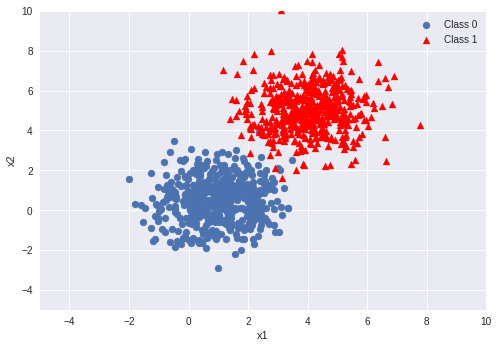

In [ ]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label = 'Class 0')

plt.scatter(dist_02[:,0],dist_02[:,1],marker = '^', color = 'r',label = 'Class 1')

plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [ ]:
x = np.concatenate([dist_01,dist_02])
a,b = [0]*500,[1]*500
y = np.array(a + b)
y = y.reshape(-1,1)
data = np.concatenate([x,y],axis = 1)
np.random.shuffle(data)

In [ ]:
from sklearn.model_selection import train_test_split
X = data[:,:2]
Y = data[:,-1]
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.2)

Logistic Regression Functions 

In [ ]:
def hypothesis(x,w,b):
    '''Accepts input vector x, input weight vector theta, and bias vector b'''
    
    h = np.dot(x,w) + b
    return sigmoid(h)
    
def sigmoid(z):
    sig = (1.0)/(1.0 + np.exp(-1.0*z))
    
    return sig

def error(y_true,x,w,b):
    m = x.shape[0]
    err = 0.0
    
    for i in range (m):
        hx = hypothesis(x[i],w,b)
        
        err += y_true[i]*np.log2(hx) + (1 - y_true[i])*np.log2(1 - hx)
        
        
    return -err/m

def get_grads(y_true,x,w,b):
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    m = x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        
        grad_w += -1*(y_true[i] - hx)*x[i]
        
        grad_b += (y_true[i] - hx)
        
    grad_w /= m
    grad_b /= m
    
    
    return [grad_w,grad_b]

def grad_descent(x,y_true,w,b,learning_rate = 0.1):    
    err = error(y_true,x,w,b)
    [grad_w,grad_b] = get_grads(y_true,x,w,b)
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    
    return err,w,b

def predict(x,w,b):
    conf = hypothesis(x,w,b)
    if conf < 0.5:
        return 0
    else:
        return 1
    
def accuracy(xtest,ytest,w,b):
    y_pred = []
    for i in range(xtest.shape[0]):
        pred = predict(xtest[i],w,b)
        y_pred.append(pred)
    y_pred = np.array(y_pred)
    return float((y_pred == ytest).sum())/ytest.shape[0]

In [ ]:
loss = []
acc = []
W = 2*np.random.random((xtrain.shape[1],))
b = 5*np.random.random()

In [ ]:
for i in range(500):
    l,w,b = grad_descent(xtrain,ytrain,W,b,learning_rate=0.1)
    ac = accuracy(xtest,ytest,w,b)
    acc.append(ac)
    loss.append(l)

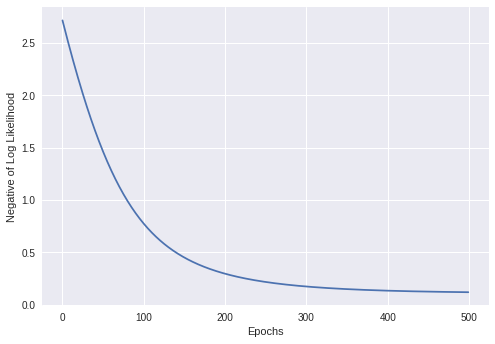

In [ ]:
plt.xlabel('Epochs')
plt.ylabel('Negative of Log Likelihood')
plt.plot(loss)
plt.show()

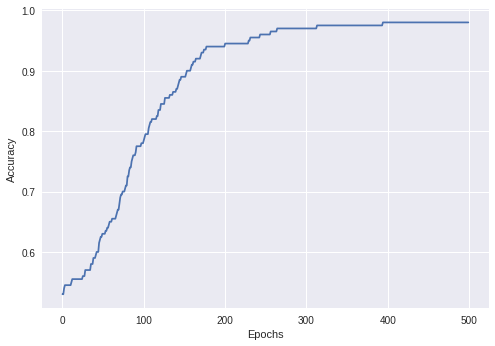

0.98


In [ ]:
plt.plot(acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()
print(acc[-1])

Plotting the decision Boundary

In [ ]:
#According to the logistic Regression equation
#    w1x1 + w2x2 + b = 0
print(w)
print(b)

[0.02364815 1.79731804]
-4.481057494276692


In [ ]:
#We can obtain 
#              x2 = -(b + w1x1)/w2

In [ ]:
test = np.linspace(-4,10,10)
w1 = w[0]
w2 = w[1]

y_line = -(b + test*w1)/w2

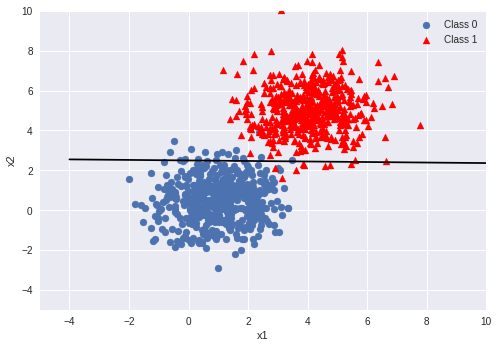

In [ ]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label = 'Class 0')

plt.scatter(dist_02[:,0],dist_02[:,1],marker = '^', color = 'r',label = 'Class 1')

plt.plot(test,y_line,c = 'black')

plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()